In [6]:
# Imports the necessary libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reads the dataset.
data = pd.read_csv('2019.csv')

# Gives an overview of the dataset in regards to mean, min,max...
data.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


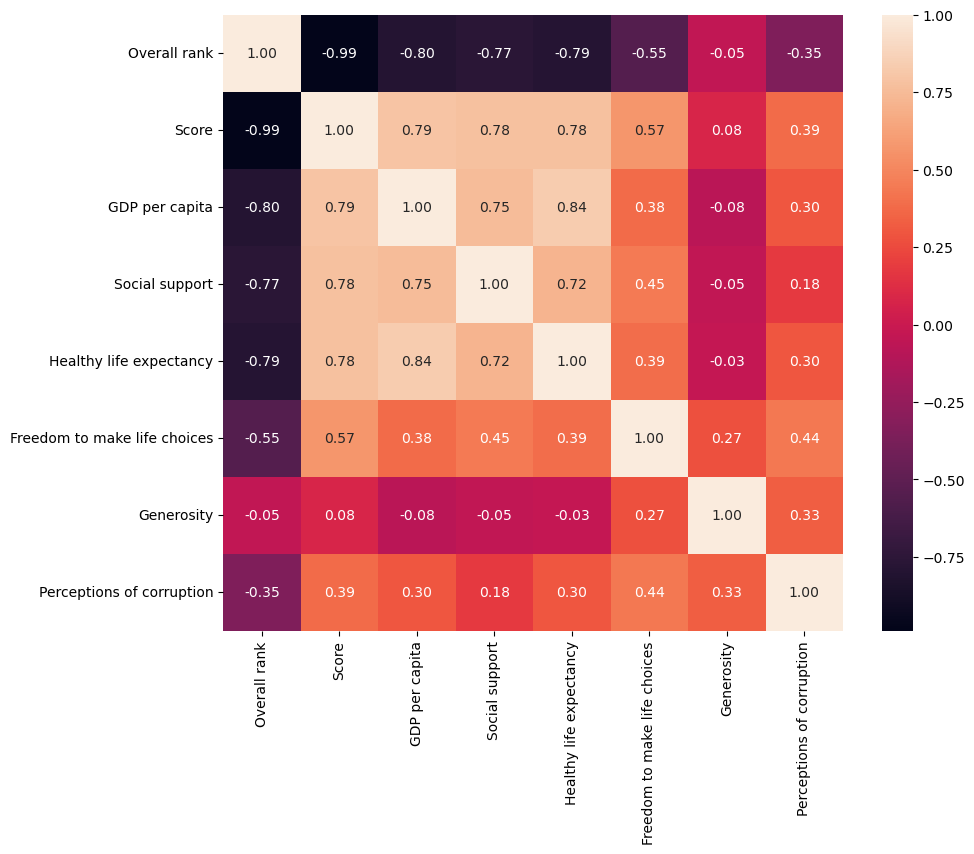

In [7]:
# Selects only numeric columns for analysis.
numeric_data = data.select_dtypes(include=[np.number])  
correlation_matrix = numeric_data.corr() 

# Sets up and displays the heatmap.
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.show()

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Defines the independent variables (X) and the dependent variable (y).
X = data[['GDP per capita', 'Social support', 'Healthy life expectancy', 
          'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]
y = data['Score']

# Splits the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creates and fits the model.
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting the Test set results.
y_pred = model.predict(X_test)

# Calculates the performance metrics.
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.4144641383528352
R^2 Score: 0.6017537913445683
